In [1]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("DirectMarketing.csv")

In [6]:
df.shape

(1000, 10)

In [7]:
print(df.shape)

(1000, 10)


In [8]:
df.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          1000 non-null   object
 1   Gender       1000 non-null   object
 2   OwnHome      1000 non-null   object
 3   Married      1000 non-null   object
 4   Location     1000 non-null   object
 5   Salary       1000 non-null   int64 
 6   Children     1000 non-null   int64 
 7   History      697 non-null    object
 8   Catalogs     1000 non-null   int64 
 9   AmountSpent  1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [53]:
df.dtypes

Age            object
Gender         object
OwnHome        object
Married        object
Location       object
Salary          int64
Children        int64
History        object
Catalogs        int64
AmountSpent     int64
dtype: object

In [10]:
df.isnull()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,True,False,False
996,False,False,False,False,False,False,False,True,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
dtype: int64

In [14]:
df.isna().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
dtype: int64

In [15]:
df.History

0        High
1        High
2         Low
3        High
4        High
        ...  
995       NaN
996       NaN
997    Medium
998    Medium
999    Medium
Name: History, Length: 1000, dtype: object

In [17]:
df.History.value_counts()

High      255
Low       230
Medium    212
Name: History, dtype: int64

In [ ]:
## its Caterogical so we replace with no purchase   
## Replace the missing value in histroy with no purchase  

In [19]:
df.History.fillna("No purchase",inplace=True)

In [ ]:
# Check the  missing values sum  after replacing 

In [23]:
df.isna().sum()

Age            0
Gender         0
OwnHome        0
Married        0
Location       0
Salary         0
Children       0
History        0
Catalogs       0
AmountSpent    0
dtype: int64

In [ ]:
# Check the  missing values sum count after replacing 

In [24]:
df.isna().sum().sum()

0

In [ ]:
# Amount spent by individual by checking with statistics  

In [ ]:
# checking the mean and median for amount spent 

In [29]:
df.AmountSpent.mean()

1216.77

In [30]:
df.AmountSpent.median()

962.0

In [ ]:
# its shows the mean is more then median and its not normal distribution 
# There are outerliers with higher values , thus we expect the  right skewed distribution 

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

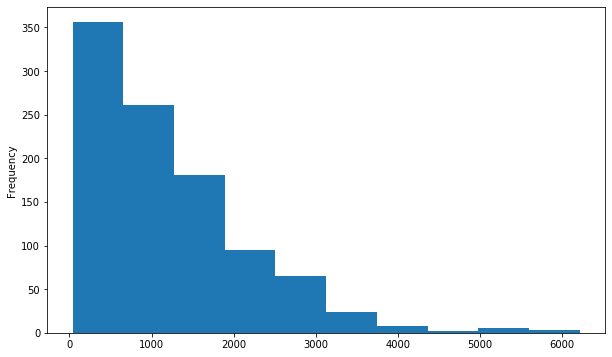

In [43]:
df.AmountSpent.plot(kind='hist',figsize=(10,6))

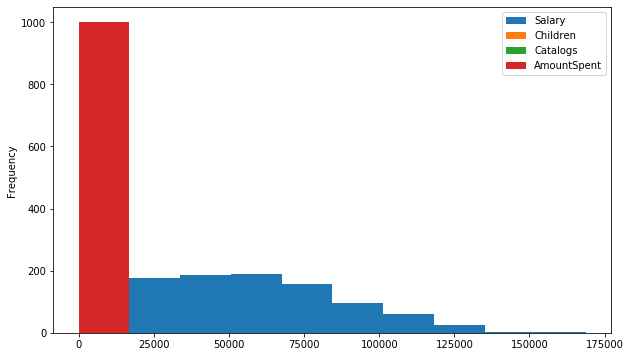

In [40]:
df.plot(kind='hist',figsize=(10,6))

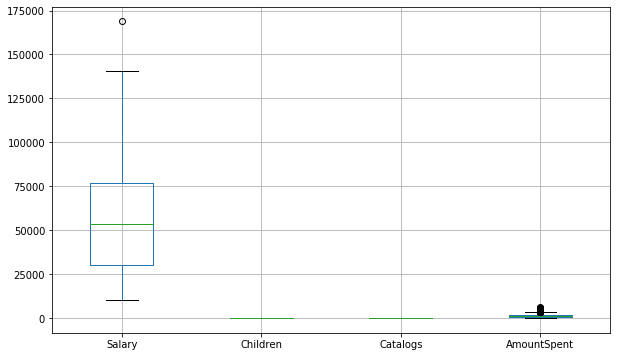

In [46]:
df.boxplot(grid=True,figsize=(10,6))

In [ ]:
# Age with amount spent 

In [58]:
df[['Age','AmountSpent']].groupby('Age').mean()

,AmountSpent
Age,
Middle,1501.690945
Old,1432.126829
Young,558.623693


In [ ]:
# Age , catlog with amount

In [63]:
df[['Age','Catalogs','AmountSpent']].groupby('Age').agg(['mean','count'])

Catalogs        AmountSpent      
             mean count         mean count
Age                                       
Middle  15.425197   508  1501.690945   508
Old     15.160976   205  1432.126829   205
Young   13.024390   287   558.623693   287

In [ ]:
# Importing visualization libraries.

In [64]:
import seaborn as sns

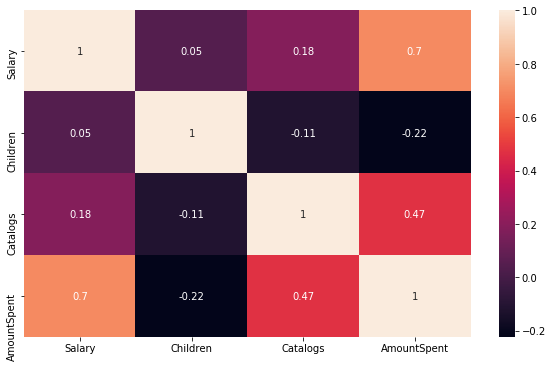

In [66]:
corr=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [ ]:
# Checking for children and age 

In [72]:
df[['Age','Children','AmountSpent']].groupby(['Age','Children']).agg(['mean','count'])

AmountSpent      
                        mean count
Age    Children                   
Middle 0         1787.193939   165
       1         1634.469512   164
       2         1187.173469    98
       3         1031.802469    81
Old    0         1491.139037   187
       1          731.100000    10
       2         1025.166667     6
       3          640.500000     2
Young  0          692.163636   110
       1          540.354839    93
       2          353.690476    42
       3          454.261905    42

In [ ]:
# check with gender and Married people spending  

In [79]:
df[['Gender','Married','AmountSpent','Catalogs']].groupby(['Gender','Married']).agg(['mean','count'])

AmountSpent         Catalogs      
                       mean count       mean count
Gender Married                                    
Female Married  1575.684444   225  15.546667   225
       Single    584.672598   281  12.960854   281
Male   Married  1750.361011   277  15.617329   277
       Single    982.018433   217  14.820276   217

In [ ]:
# checking location of the store spending 

In [87]:
df[['Location','AmountSpent']].groupby(['Location']).agg(['mean','count','sum'])

AmountSpent              
                 mean count     sum
Location                           
Close     1061.685915   710  753797
Far       1596.458621   290  462973

In [90]:
df[['Salary','Married','AmountSpent']].groupby(['Salary','Married']).agg(['mean','count'])

AmountSpent      
                      mean count
Salary Married                  
10100  Married       93.00     1
10200  Single       276.75     4
10400  Single       189.00     1
10600  Single       315.50     2
10800  Single       123.00     1
...                    ...   ...
134500 Married     4558.00     1
135700 Married     2746.00     1
140000 Married     4894.00     1
140700 Married     1001.00     1
168800 Married     1512.00     1

[717 rows x 2 columns]

In [91]:
max=df.AmountSpent

In [92]:
df.AmountSpent.nunique()

852

In [95]:
df.Salary.nunique()

636

In [96]:
df[['OwnHome','Location','AmountSpent']].groupby(['OwnHome','Location']).agg(['mean','count'])

AmountSpent      
                         mean count
OwnHome Location                   
Own     Close     1334.310160   374
        Far       2093.140845   142
Rent    Close      758.229167   336
        Far       1119.912162   148